## Resources

   1. Python Docs: https://docs.python.org/3/
   
   1. Python Tutorial (comprehensive): https://docs.python.org/3/tutorial/index.html
   
   1. Python Library Reference (the nitty-gritty details): https://docs.python.org/3/library/index.html
   
   1. Everything else: http://google.com
   

# A Python Quick Start Tutorial
# Lesson \#1: Basic data types and functions
## by Peter Mackenzie-Helnwein
University of Washington, Seattle, WA

pmackenz@uw.edu          
https://www.ce.washington.edu/facultyfinder/peter-mackenzie-helnwein

## Discussing questions from the self-study assignment

This section is to discuss your questions


### Exercise 1

**Theory**:
Stress transformation

$$
\begin{aligned}
\sigma_{x}' &= \sigma_{x} \cos^2\theta + \sigma_{y} \sin^2\theta + 2\tau_{xy} \sin\theta \cos\theta \\
\sigma_{y}' &= \sigma_{x} \sin^2\theta + \sigma_{y} \cos^2\theta - 2\tau_{xy} \sin\theta \cos\theta \\
\tau_{xy}'  &= (\sigma_{y} - \sigma_{x}) \sin\theta \cos\theta + \tau_{xy} (\cos^2\theta - \sin^2\theta) \\
\end{aligned}
$$

**Given**:
Stress state:

$$
\sigma_{x} = 12~ksi~,
~~~
\sigma_{y} = -5.5~ksi~,
~~~
\tau_{xy} = 3.5~ksi 
$$

**Find**:
Components of stress in a rotated coordinate system for $\theta=25^\circ$.

In [10]:
# theta needs to be in radians
# sin and cos are not part of phython
from math import sin, cos, pi, radians

sigma_x = 12. #ksi
sigma_y = -5.5 #ksi
tau_xy = 3.5 #ksi
theta = radians(25.)

sx = sigma_x*cos(theta)**2 + sigma_y*sin(theta)**2 + 2*tau_xy*sin(theta)*cos(theta)
sy = sigma_x*cos(theta)**2 + sigma_y*sin(theta)**2 - 2*tau_xy*sin(theta)*cos(theta)
txy = (sigma_y - sigma_x)*sin(theta)*cos(theta) + tau_xy*((cos(theta)**2)*(sin(theta)**2))



In [29]:
print("sigma_x  = {:25.2f} ksi".format(sigma_x))
print("sigma_y  = {:25.2f} ksi".format(sigma_y))
print("tau_xy   = {:25.2f} ksi".format(tau_xy))

print("sigma_x' = {:25.2f} ksi".format(sx))
print("sigma_y' = {:25.2f} ksi".format(sy))
print("tau_xy'  = {:25.2f} ksi".format(txy))

sigma_x  =                     12.00 ksi
sigma_y  =                     -5.50 ksi
tau_xy   =                      3.50 ksi
sigma_x' =                     11.56 ksi
sigma_y' =                      6.19 ksi
tau_xy'  =                     -6.19 ksi


3.141592653589793

### Exercise 2

Convert the calculation from exercise 1 to a function

In [31]:
def stressTransform(sigma_x, sigma_y, tau_xy, theta):
    th_rad = radians(theta)
    sx = sigma_x*cos(th_rad)**2 + sigma_y*sin(th_rad)**2 + 2*tau_xy*sin(th_rad)*cos(th_rad)
    sy = sigma_x*cos(th_rad)**2 + sigma_y*sin(th_rad)**2 - 2*tau_xy*sin(th_rad)*cos(th_rad)
    txy = (sigma_y - sigma_x)*sin(th_rad)*cos(th_rad) + tau_xy*((cos(th_rad)**2)*(sin(th_rad)**2))
    
    return (sx,sy,txy)

Test your function for 

* $\theta=0$ (what should the result look like?)
* $\theta=25^\circ$
* $\theta=180^\circ$

In [35]:
stressTransform(sigma_x,sigma_y,tau_xy, 0)

(12.0, 12.0, 0.0)

In [36]:
stressTransform(sigma_x,sigma_y,tau_xy, 25)

(11.555547135673642, 6.193236033840795, -6.1894177995617765)

In [37]:
stressTransform(sigma_x,sigma_y,tau_xy, 180)

(12.0, 12.0, 2.1431318985078682e-15)

In [40]:
stress=stressTransform(sigma_x,sigma_y,tau_xy, 25)

In [47]:
print(stress)

(11.555547135673642, 6.193236033840795, -6.1894177995617765)


In [49]:
stress[2]

-6.1894177995617765

In [51]:
(a,b,c)=stressTransform(sigma_x, sigma_y, tau_xy, 25)

In [52]:
print(a)
print(b)
print(c)

11.555547135673642
6.193236033840795
-6.1894177995617765


### Exercise 3

Let's use this function to study stress transformation.  In order to do so,

1. Create a list of 81 evenly spaced $\theta$-values from $0^\circ$ to $180^\circ$.
2. Compute the transformed stress for each of these values and collect the results in three lists: 

       sigmax_values = ...
       sigmay_values = ...
       tauxy_values = ...

3. print a nice table with 4 columns: $\theta$, $\sigma_x'$, $\sigma_y'$, $\tau_{xy}'$

In [75]:
sigmax_values = []
sigmay_values = []
tauxy_values = []

# YOUR CODE HERE

In [95]:
theta = []

print("            theta         sigma_x        sigma_y         tau_xy")
print("-----------------------------------------------------------------")

for i in range(81):
    th = i*180/80;
    theta.append(th) 
    (sx,sy,tau) = stressTransform(sigma_x,sigma_y,tau_xy, th)
    sigmax_values.append(sx)
    sigmay_values.append(sy)
    tauxy_values.append(tau)
    print("         {:10.4f}     {:10.4f}    {:10.4f}      {:10.4f}".format(th,sx,sy,tau))

            theta         sigma_x        sigma_y         tau_xy
-----------------------------------------------------------------
             0.0000        12.0000       12.0000          0.0000
             2.2500        12.2476       11.6984         -0.6811
             4.5000        12.4398       11.3448         -1.3474
             6.7500        12.5753       10.9412         -1.9950
             9.0000        12.6533       10.4902         -2.6203
            11.2500        12.6733        9.9946         -3.2203
            13.5000        12.6353        9.4573         -3.7921
            15.7500        12.5393        8.8819         -4.3330
            18.0000        12.3861        8.2717         -4.8408
            20.2500        12.1766        7.6305         -5.3136
            22.5000        11.9121        6.9623         -5.7497
            24.7500        11.5941        6.2712         -6.1476
            27.0000        11.2247        5.5616         -6.5062
            29.2500      

In [85]:
#prueba
for i in range(81):
    th = i*180/80;
    print(th)
    

0.0
2.25
4.5
6.75
9.0
11.25
13.5
15.75
18.0
20.25
22.5
24.75
27.0
29.25
31.5
33.75
36.0
38.25
40.5
42.75
45.0
47.25
49.5
51.75
54.0
56.25
58.5
60.75
63.0
65.25
67.5
69.75
72.0
74.25
76.5
78.75
81.0
83.25
85.5
87.75
90.0
92.25
94.5
96.75
99.0
101.25
103.5
105.75
108.0
110.25
112.5
114.75
117.0
119.25
121.5
123.75
126.0
128.25
130.5
132.75
135.0
137.25
139.5
141.75
144.0
146.25
148.5
150.75
153.0
155.25
157.5
159.75
162.0
164.25
166.5
168.75
171.0
173.25
175.5
177.75
180.0


### Exercise 4: Explore plotting in python

For this, check out https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/simple_plot.html#sphx-glr-gallery-lines-bars-and-markers-simple-plot-py

I copied the demo code below so you can modify it to plot $(\sigma_{x}'/\tau_{xy}')$ and  $(\sigma_{y}'/-\tau_{xy}')$ curves from the data collected in `sigmax_values`, `sigmay_values`, `tauxy_values`

AttributeError: 'numpy.ndarray' object has no attribute 'grid'

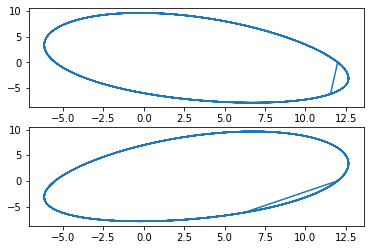

In [120]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
sigmax_values
sigmay_values
tauxy_values

fig, axs = plt.subplots(2)
fig.subtitle=('About as simple as it gets, folks')
axs[0].plot(sigmax_values, tauxy_values)
axs[1].plot(sigmay_values, tauxy_values)
ax.grid()

# I comment writing the figure to file ... makes this quicker
# fig.savefig("test.png")
plt.show()

**Remark**: This was just to wet your appetite! We will talk much more about `numpy` and `matplotlib` next week.

## Exercise 5: List versus dictionary

You could express the stress state as

1. three independent variables - the way we did it thus far

2. a list of three values: `stress = `$[\sigma_x, \sigma_y, \tau_{xy}]$ and replace

        sigma_x --> stress[0]
        sigma_y --> stress[2]
        tau_xy  --> stress[3]
        
3. a dictionary 

        stress = {'sigx': 12.0, 'sigy': -5.5, 'tau':3.50}
        
   and replace

        sigma_x --> stress['sigx']
        sigma_y --> stress['sigy']
        tau_xy  --> stress['tau']

**Discuss**:

1. Pros and cons for coding the equations
2. Pros and cons for coding the function(s)
3. How woud code and function change when switching from 2D to 3D (6 components instead of 3 components)

Feel free to implement an alternative form of stressTrannsform() that looks like this:

In [ ]:
def stressTransform(stress, theta):
    # YOUR CODE
    # stress2 is a list or dictionary, just as stress is
    
    return stress2

## Homework questions

We can all learn from your questions!